# Exploring the Weather in Athens

Assignment 1

---

> Odyssefs Diamantopoulos Pantaleon, Undergraduate Student <br />
> Department of Computer Science<br />
> Athens University of Economics and Business <br />
> p3180049@aueb.gr

---
## Q1: Obtain the Data



### 1.1 Import the original dataset

> Here I am importing all the necessary libraries that will help in the assignment.

>The numpy lib is used for mathematic functions, the pandas lib is useful for dataframe manipulatio and matplotlib and seaborn are great for plots.

>I am also setting pd.options.mode.chained_assignment to None in order to supress some warnings of deprecated functions according to what I found to stack overflow https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.dates import MonthLocator, DateFormatter

pd.options.mode.chained_assignment = None #https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas


#import all the libraries

>Here I import the maindata set that includes all the measurement of the Hellinikon Station for the period of 1955-2020.

In [2]:
data = pd.read_csv("weatherdata.csv") #import the data

>Here I show that all the measurements were recorded from the Hellinikon station so we can drop the Station column since it
does not provide any additional information

In [3]:
data.STATION.head(20)

0     GR000016716
1     GR000016716
2     GR000016716
3     GR000016716
4     GR000016716
5     GR000016716
6     GR000016716
7     GR000016716
8     GR000016716
9     GR000016716
10    GR000016716
11    GR000016716
12    GR000016716
13    GR000016716
14    GR000016716
15    GR000016716
16    GR000016716
17    GR000016716
18    GR000016716
19    GR000016716
Name: STATION, dtype: object

In [4]:
data.loc[data.STATION != 'GR000016716'] #we see there is only one station so we can drop the column

,STATION,DATE,PRCP,TAVG


In [5]:
croppedData = data.drop('STATION',1)

c:\users\gragas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


>Following that, I am converting the type of the Date column from str to datetime so I can easily access years,months,days

In [6]:
croppedData['DATE'] = pd.to_datetime(croppedData['DATE'])  #converting column type to date type

In [7]:
croppedData.head(10)

,DATE,PRCP,TAVG
0,1955-01-01,0.0,NaN
1,1955-01-02,2.0,NaN
2,1955-01-03,0.0,NaN
3,1955-01-04,0.0,NaN
4,1955-01-05,0.0,NaN
5,1955-01-06,0.0,NaN
6,1955-01-07,0.0,NaN
7,1955-01-08,0.0,NaN
8,1955-01-09,3.0,NaN
9,1955-01-10,0.0,NaN


>I am now checking to see what data is missing from the database that I was given

In [8]:
croppedData['DATE'].isnull().sum() 
#values that are missing based on this site :
#'https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/'

0

In [9]:
check = croppedData.copy()

> Although there are no null values in the DATE column, while examining the csv I noticed that at some years there were fewer data than other years. 

> As shown below, for some reason in 2012 and 2013 there were recorded 160 and 10 days accordingly


In [10]:
check.loc[check['DATE'].dt.year==2012]

,DATE,PRCP,TAVG
20816,2012-01-01,0.0,10.2
20817,2012-01-02,0.0,9.5
20818,2012-01-03,0.0,9.7
20819,2012-01-04,0.0,11.3
20820,2012-01-05,0.0,11.1
...,...,...,...
20971,2012-08-09,0.0,34.2
20972,2012-08-12,0.0,28.7
20973,2012-08-25,0.0,34.6
20974,2012-08-26,0.0,31.2


In [11]:
check.loc[check['DATE'].dt.year==2013] #many missing rows on 2012,2013

,DATE,PRCP,TAVG
20976,2013-02-15,0.0,9.8
20977,2013-02-19,0.3,12.1
20978,2013-02-21,0.0,12.6
20979,2013-04-22,0.0,18.6
20980,2013-05-16,0.0,20.9
20981,2013-05-28,0.0,22.6
20982,2013-06-05,0.0,23.2
20983,2013-06-07,0.0,23.3
20984,2013-06-11,0.0,27.0
20985,2013-11-20,1.8,19.3


>Also, while searching the other two columns(TAVG,PRCP) I found that there were multiple null values

In [12]:
croppedData['PRCP'].isnull().sum() #values that are missing 

478

In [13]:
croppedData['TAVG'].isnull().sum() #values that are missing 

2311

### 1.2 Import the additional data and add them to the original data frame

> Since I know that there are missing values I have to correctly use the additional data that was provided for the years 2010-2019

>The columns assigned are the ones that were mentioned in the documentation of the data https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f

>I also manually deleted 4 '---' lines that existed in the additional data csv that were creating errors on the DATE column calculations


In [14]:
filldata = pd.read_csv("athens.csv",names=['DATE','TAVG','MaxTemp','MinTemp','MeanHum','MaxHum','MinHum','MeanPress','MaxPress','MinPress','PRCP','WindSpeed','WindDir','WindGust']) #import the additional data with custom column names

In [15]:
filldata.head()

,DATE,TAVG,MaxTemp,MinTemp,MeanHum,MaxHum,MinHum,MeanPress,MaxPress,MinPress,PRCP,WindSpeed,WindDir,WindGust
0,1/1/2010,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
1,1/2/2010,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
2,1/3/2010,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
3,1/4/2010,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
4,1/5/2010,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8


> I need to convert the type to datetime here too so I can easily access it

In [16]:
filldata['DATE'] = pd.to_datetime(filldata['DATE'])  

#### 1.2.1 Merging data frames

> As you can see below, the additional dataset has all the days/months that were missing from the original data. 


In [17]:
filldata.loc[filldata['DATE'].dt.year==2012]

,DATE,TAVG,MaxTemp,MinTemp,MeanHum,MaxHum,MinHum,MeanPress,MaxPress,MinPress,PRCP,WindSpeed,WindDir,WindGust
730,2012-01-01,9.4,9.5,9.4,60.6,67,49,1020.2,1026.1,1012.7,0.0,4.1,NNE,10.8
731,2012-01-02,8.4,8.6,8.3,63.5,82,43,1026.1,1027.6,1024.8,0.0,1.0,N,4.3
732,2012-01-03,8.7,8.8,8.5,69.9,89,47,1025.7,1026.9,1024.8,0.0,0.6,NW,3.1
733,2012-01-04,10.2,10.3,10.1,77.6,92,64,1021.9,1026.0,1018.1,0.0,1.5,NNW,5.3
734,2012-01-05,10.5,10.7,10.4,80.8,91,66,1013.2,1018.1,1004.9,0.0,1.5,SSW,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2012-12-27,13.2,13.3,13.0,80.5,92,60,1021.0,1022.2,1019.7,0.2,1.0,SW,4.6
1092,2012-12-28,13.3,13.5,13.2,82.2,92,65,1016.8,1019.9,1013.7,0.2,0.9,WNW,4.2
1093,2012-12-29,12.1,12.1,12.0,86.4,90,76,1015.0,1018.0,1012.5,27.2,3.4,N,8.4
1094,2012-12-30,10.3,10.4,10.2,88.2,93,81,1020.1,1022.4,1017.4,50.0,2.8,N,9.0


In [18]:
filldata.loc[filldata['DATE'].dt.year==2013]

,DATE,TAVG,MaxTemp,MinTemp,MeanHum,MaxHum,MinHum,MeanPress,MaxPress,MinPress,PRCP,WindSpeed,WindDir,WindGust
1096,2013-01-01,11.3,11.4,11.2,78.3,88,66,1021.2,1022.7,1020.1,0.0,1.0,NNW,4.3
1097,2013-01-02,10.9,11.0,10.7,82.7,92,65,1025.4,1028.8,1022.7,0.0,0.6,SSW,3.1
1098,2013-01-03,11.6,11.7,11.5,78.5,93,65,1030.0,1031.6,1028.6,0.2,0.6,SSW,3.2
1099,2013-01-04,11.2,11.3,11.0,64.0,83,38,1023.2,1028.5,1018.9,0.0,0.6,N,3.7
1100,2013-01-05,11.3,11.4,11.2,57.4,76,40,1014.2,1018.9,1009.2,0.0,1.2,W,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2013-12-27,13.9,14.0,13.9,85.5,90,78,1011.7,1013.0,1010.4,30.0,4.8,S,13.7
1457,2013-12-28,13.3,13.4,13.3,78.0,85,69,1013.4,1015.7,1011.2,0.8,7.5,NNE,15.9
1458,2013-12-29,13.0,13.2,12.9,67.6,81,51,1018.0,1020.8,1015.1,0.0,1.4,N,6.1
1459,2013-12-30,12.2,12.3,12.0,70.5,85,50,1021.4,1022.4,1020.1,0.0,1.1,N,4.7


>Consequently when merging the datasets, I am going to perform an outer join so I can get all the Dates that were missing

>We are also only going to take the DATE,PRCP and TAVG columns since they are the only ones needed in this assignment

>To accomplish the merging of the data, we have to merge them based on some principle. This principle is going to be the DATE column that both datasets share

>To preserve the original order of the data on the croppedData dataframe we sort based on DATE values and set it as an index


In [19]:
croppedData = pd.merge(croppedData, 
               filldata[['DATE','PRCP','TAVG']], 
               on='DATE', 
               how='outer').sort_values('DATE').set_index('DATE') #the filldata database has all the days and months of 2012 and 2013 so we need to join based on this

In [20]:
croppedData.head()

,PRCP_x,TAVG_x,PRCP_y,TAVG_y
DATE,,,,
1955-01-01,0.0,NaN,NaN,NaN
1955-01-02,2.0,NaN,NaN,NaN
1955-01-03,0.0,NaN,NaN,NaN
1955-01-04,0.0,NaN,NaN,NaN
1955-01-05,0.0,NaN,NaN,NaN


> In order to remove DATE from an index and place it back as a column while retaining the same order that existed then we have to use the reindex function and then drop it. 

In [21]:
croppedData = (croppedData.reindex(pd.date_range(croppedData.index.min(), croppedData.index.max(), name='DATE'))
       .reset_index())

>Now another problem arises. After the merge the PRCP and TAVG columns were split into x and y. The x columns have the data of the first dataset, while the y have the data of the second dataset.

>Consequently I am going to fill any null values that the original dataset has with the values from the other dataset. In other words the TAVG_x and PRCP_x columns will get filled with the TAVG_y and PRCP_y columns

>If everything goes well we should see a decrease in null values from when we previously counted

In [22]:
croppedData.head()

,DATE,PRCP_x,TAVG_x,PRCP_y,TAVG_y
0,1955-01-01,0.0,NaN,NaN,NaN
1,1955-01-02,2.0,NaN,NaN,NaN
2,1955-01-03,0.0,NaN,NaN,NaN
3,1955-01-04,0.0,NaN,NaN,NaN
4,1955-01-05,0.0,NaN,NaN,NaN


In [23]:
croppedData['PRCP_x'].fillna(croppedData['PRCP_y'],inplace=True)

In [24]:
croppedData['TAVG_x'].fillna(croppedData['TAVG_y'],inplace=True)

In [25]:
croppedData.head()

,DATE,PRCP_x,TAVG_x,PRCP_y,TAVG_y
0,1955-01-01,0.0,NaN,NaN,NaN
1,1955-01-02,2.0,NaN,NaN,NaN
2,1955-01-03,0.0,NaN,NaN,NaN
3,1955-01-04,0.0,NaN,NaN,NaN
4,1955-01-05,0.0,NaN,NaN,NaN


>Now that the process is finished I can drop the two columns and rename the other two to the original names.

>According to the calculations performed now there are 379(< 478) values missing on the PRCP column and 2315(>2311) in the TAVG column.

>As we can see the TAVG null values were increased a bit, but that makes sense since we added a lot more DATE values.

>Now I have to decide how I am going to handle the missing data.

In [26]:
croppedData = croppedData.drop('PRCP_y',1)
croppedData = croppedData.drop('TAVG_y',1)

c:\users\gragas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
c:\users\gragas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [27]:
croppedData = croppedData.rename(columns={'PRCP_x' : 'PRCP', 'TAVG_x' : 'TAVG'})

In [28]:
croppedData.columns

Index(['DATE', 'PRCP', 'TAVG'], dtype='object')

In [29]:
croppedData['PRCP'].isnull().sum() #values that are missing | makes sense cause we have data from 2010-2020

379

In [30]:
croppedData['TAVG'].isnull().sum() #values that are missing 

2315

#### 1.2.3 Deciding how to fill the missing collumn data

---
>https://www.nasa.gov/topics/earth/features/upsDownsGlobalWarming.html
>https://www.nasa.gov/images/content/388671main_portal1ThumbShrunk.jpg
>https://www.nasa.gov/images/content/388673main_portalChart2.jpg

>My initial thought was to try and fill the missing TAVG cell data with the average of temperature of years I have a lot of data.

>According to the data shown in the above links of the nasa official webisite, the climate change has an effect on the temperatures. However, the period 1950-1970 did no see such a dramatic change in temperatures.

>I calculated the mean temperature of all my dataset in order to see how much me filling the data would impact the overall value of the dataset



In [31]:
allyearmean = croppedData['TAVG'].mean(skipna=True)

In [32]:
print(allyearmean)

18.375899412628485


>I decided to see which years were the ones that had a lot of data missing

>Before 1973 a lot of data was missing

In [33]:
missingyeardata = (croppedData['DATE'] >= '1973-01-01') & (croppedData['DATE'] <= '2020-12-31') #1973 has only 9 values missing

In [34]:
croppedData.loc[missingyeardata]['TAVG'].isnull().sum() #values that are missing 

13

In [35]:
missingyeardata = (croppedData['DATE'] >= '1972-01-01') & (croppedData['DATE'] <= '2020-12-31') #1972 has many values missing

In [36]:
croppedData.loc[missingyeardata]['TAVG'].isnull().sum() #values that are missing 

379

>So I decided to get the average temperature from 1973-1980 and use it to fill the null values of the dataset

>The reason that the fillna is commented is because I later realized that this was not a viable solution

In [37]:
sevenyeardata = (croppedData['DATE'] >= '1973-01-01') & (croppedData['DATE'] <= '1980-12-31') 

In [38]:
sevenyearmean = croppedData.loc[sevenyeardata]['TAVG'].mean()

In [39]:
#croppedData['TAVG'].fillna(sevenyearmean,inplace = True) 

> If I did not comment this line, the mean of the whole dataset would not drastically change, HOWEVER, I would have several years where every day of them would have the same value, the mean of the 1973-1980 years.

> This would severly impact the plots and in many situations would give false information.

> Consequently, I decided to leave the values null and concede that I cannot calculate with great accuracy years before 1973.

> I do not think that this will be a great problem since we can still have a good picture of old times, while maintaining both a great picture of more modern years(that actually interest us more) and a reliable wider picture of the climate change that Athens experienced.

---

> I also left the PRCP values null since there were too few to make a negative impact on the dataset

---
## Q2: Deviation of Summer Temperatures

### 2.1 Organizing data to seasons

> Here I am organizing the data to seasons in order to be able to groupby season==summer later. Every day is assigned a season.

> This is a simple trick. You modulo with the number of total months, add 3 and then do integer division with 3 and the correct season is mapped.

> For example, if we take January it will fall on the winter season since its 1%12 = 1  then 1+3=4 and finally 4//3=1 which is correctly winter

In [40]:

croppedData['season'] = (croppedData['DATE'].dt.month%12 + 3)//3

seasons = { 1: 'Winter', 2: 'Spring', 3: 'Summer',4: 'Autumn'}

croppedData['season_name'] = croppedData['season'].map(seasons)  #all rights belong to https://stackoverflow.com/questions/60285557/extract-seasons-from-datetime-pandas

In [41]:
croppedData.head()

,DATE,PRCP,TAVG,season,season_name
0,1955-01-01,0.0,NaN,1,Winter
1,1955-01-02,2.0,NaN,1,Winter
2,1955-01-03,0.0,NaN,1,Winter
3,1955-01-04,0.0,NaN,1,Winter
4,1955-01-05,0.0,NaN,1,Winter


### 2.2 Extracting summer months from 1973-1999

> In order to get only the summer months, I just have to set as an index the season and then take everything that has as an index the Summer keyword

> After I create a new dataframe with only Summer data I reset the index

In [42]:
datawithseasonindex = croppedData.set_index('season_name',)

In [43]:
summerdata = datawithseasonindex.loc['Summer']

In [44]:
summerdata.head()

,DATE,PRCP,TAVG,season
season_name,,,,
Summer,1955-06-01,0.0,NaN,3
Summer,1955-06-02,0.0,NaN,3
Summer,1955-06-03,0.0,NaN,3
Summer,1955-06-04,0.0,NaN,3
Summer,1955-06-05,0.0,NaN,3


In [45]:
summerdata.reset_index( inplace=True)

In [46]:
summerdata.head()

,season_name,DATE,PRCP,TAVG,season
0,Summer,1955-06-01,0.0,NaN,3
1,Summer,1955-06-02,0.0,NaN,3
2,Summer,1955-06-03,0.0,NaN,3
3,Summer,1955-06-04,0.0,NaN,3
4,Summer,1955-06-05,0.0,NaN,3


> The assignment demands that the plot has as a baseline the period of 1974-1999, so I create a new dataframe that contains the summer months of 1974-1999 and reset its index so it is starts from 0

In [47]:
specificsummerdata = summerdata.loc[(summerdata ['DATE'].dt.year >= 1974) 
                    & (summerdata ['DATE'].dt.year <= 1999)]

In [48]:
specificsummerdata.head()

,season_name,DATE,PRCP,TAVG,season
1748,Summer,1974-06-01,0.0,22.7,3
1749,Summer,1974-06-02,0.0,23.2,3
1750,Summer,1974-06-03,0.2,22.2,3
1751,Summer,1974-06-04,2.5,21.0,3
1752,Summer,1974-06-05,0.0,24.0,3


In [49]:
specificsummerdata.reset_index(drop=True,inplace=True)

In [50]:
specificsummerdata.head()

,season_name,DATE,PRCP,TAVG,season
0,Summer,1974-06-01,0.0,22.7,3
1,Summer,1974-06-02,0.0,23.2,3
2,Summer,1974-06-03,0.2,22.2,3
3,Summer,1974-06-04,2.5,21.0,3
4,Summer,1974-06-05,0.0,24.0,3


### 2.3 Preparing the Data 

> I create another column that contains only the year of each row, which is going to help into summing all the TAVG of a year

>To do that I use the groupby function, I sum it based on the year and I place it into a new column that now has the year total of temperatures. https://towardsdatascience.com/pandas-tips-and-tricks-33bcc8a40bb9

>In order to find the average of the year I just have to divide with 92, which are the total days that every summer has. Consequently, year_total now has the average temperature of the summer.

In [51]:
specificsummerdata.loc[:,'year'] = specificsummerdata.loc[:,('DATE')].dt.year

In [52]:
specificsummerdata['year_total'] = specificsummerdata.groupby(['year'])['TAVG'].transform(sum) #source: https://towardsdatascience.com/pandas-tips-and-tricks-33bcc8a40bb9

In [53]:
specificsummerdata.loc[:,'year_total'] = specificsummerdata.loc[:,('year_total')].div(92) #Because every summer has 92 days =31+30+31

In [54]:
specificsummerdata.head()

,season_name,DATE,PRCP,TAVG,season,year,year_total
0,Summer,1974-06-01,0.0,22.7,3,1974,24.783696
1,Summer,1974-06-02,0.0,23.2,3,1974,24.783696
2,Summer,1974-06-03,0.2,22.2,3,1974,24.783696
3,Summer,1974-06-04,2.5,21.0,3,1974,24.783696
4,Summer,1974-06-05,0.0,24.0,3,1974,24.783696


> Now that I have organized my baseline, I copy it into a new dataframe in order to be able to use it for plotting.

>I drop all the duplicates and what is left is one row for each year which contains the average temperature of every summer.


In [55]:
onlysummertemps = specificsummerdata[['year','year_total']].copy()

In [56]:
onlysummertemps.drop_duplicates(keep='last',inplace=True)

In [57]:
onlysummertemps.head()

,year,year_total
91,1974,24.783696
183,1975,25.935870
275,1976,24.820652
367,1977,26.558696
459,1978,25.790217


> I then calculate the deviation mean of each year by subtracting from the total temp of a summer of a specific year the average temperature of all the years from 1974-1999

>After that I use the rolling function to calculate the rolling average of the deviation for a period of 10 years. However, in order to have a line from the beggining of the data I set the minimum periods to 1 so there are no null cells.


In [58]:
onlysummertemps['deviation_mean'] = onlysummertemps['year_total'] - specificsummerdata['TAVG'].mean()

In [59]:
onlysummertemps['rolling_av_dev'] = onlysummertemps['deviation_mean'].rolling(10,min_periods=1).mean()

In [60]:
onlysummertemps.reset_index(drop=True, inplace=True)

In [61]:
onlysummertemps.head(26)

,year,year_total,deviation_mean,rolling_av_dev
0,1974,24.783696,-1.448450,-1.448450
1,1975,25.935870,-0.296276,-0.872363
2,1976,24.820652,-1.411494,-1.052073
3,1977,26.558696,0.326550,-0.707418
4,1978,25.790217,-0.441928,-0.654320
5,1979,26.150000,-0.082146,-0.558957
6,1980,25.596739,-0.635407,-0.569879
7,1981,25.557609,-0.674537,-0.582961
8,1982,25.027174,-1.204972,-0.652073
9,1983,24.348913,-1.883233,-0.775189


### 2.4 Designing the Plot

> I am using the matplot lib in order to create the plot

> The bars are colored based on if the year's deviation mean was above or below 0.

> There is also the gold line that indicates the rolling average

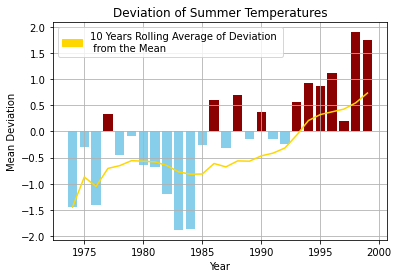

In [62]:
fig = plt.figure()

plt.bar(onlysummertemps['year'],onlysummertemps['deviation_mean'],color = (onlysummertemps['deviation_mean'] > 0).map
                                            ({True:'darkred', False:'skyblue'}))

plt.plot(onlysummertemps['year'],onlysummertemps['rolling_av_dev'],color='gold')

plt.xlabel('Year')
plt.ylabel('Mean Deviation')
plt.title("Deviation of Summer Temperatures")
plt.grid()

rolling = mpatches.Patch(color='gold', label='10 Years Rolling Average of Deviation \n from the Mean')
plt.legend(handles=[rolling])

plt.savefig('DeviationOfSummerTemperatures.png')            

plt.show()


> My interpetation of the figure is that the climate in Athens indeed became warmer in the summers. We took the baseline of 1974-1999 and compared to it every year's average summer temperature. As shown before 1986 we had much colder summers. However, after 1986 every summer became warmer. Finally, as shown by the rolling deviation line the trend shows that the summer season is going to keep getting warmer and we are going to experience more heat.

## Q3: Evolution of Daily Temperatures

### 3.1.1  Handling the Data in order to create the average daily temperature for the baseline period of 1974-1999

In [63]:
croppedData.head()

,DATE,PRCP,TAVG,season,season_name
0,1955-01-01,0.0,NaN,1,Winter
1,1955-01-02,2.0,NaN,1,Winter
2,1955-01-03,0.0,NaN,1,Winter
3,1955-01-04,0.0,NaN,1,Winter
4,1955-01-05,0.0,NaN,1,Winter


> First, we have to create a dataframe and make it our baseline. That is what I am doing below and I am only taking the years 1974-1999

>After that I am going to drop all the unecessary columns and create two separate columns for month and day that are going to help in the groupby function

In [64]:
q3dailydata = croppedData[(croppedData ['DATE'].dt.year >= 1974) 
                    & (croppedData ['DATE'].dt.year <= 1999) ] #creating the dataframe that contains the data from 1974-1999

In [65]:
q3dailydata.drop("PRCP",1,inplace=True)
q3dailydata.drop("season",1,inplace=True)
q3dailydata.drop("season_name",1,inplace=True)

c:\users\gragas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
c:\users\gragas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
c:\users\gragas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
q3dailydata.head()

,DATE,TAVG
6940,1974-01-01,11.6
6941,1974-01-02,13.7
6942,1974-01-03,12.2
6943,1974-01-04,10.8
6944,1974-01-05,9.6


In [67]:
q3dailydata.loc[:,'day'] = q3dailydata.loc[:,('DATE')].dt.day

In [68]:
q3dailydata.loc[:,'month'] = q3dailydata.loc[:,('DATE')].dt.month

>In order to calculate the data needed for the baseline, I basically have to find the average temperature of all the first days of January and so on.

>That is why I am grouping by day and month and summing all the values together.

>I now have the sum of all the first of January days, and this result is contained in all the years(01/01/year)

In [69]:
q3dailydata['25yeardayaverage'] = q3dailydata.groupby(['day','month'])['TAVG'].transform(sum)

In [70]:
q3dailydata.head()

,DATE,TAVG,day,month,25yeardayaverage
6940,1974-01-01,11.6,1,1,269.5
6941,1974-01-02,13.7,2,1,278.4
6942,1974-01-03,12.2,3,1,265.4
6943,1974-01-04,10.8,4,1,250.5
6944,1974-01-05,9.6,5,1,257.9


### 3.1.2 Finding out how the average of each day considering the fact that leap years exist

>All regural days will be divided with 25 since they occur 25 times in 25 years

>29th of February occurs only in leap years

>We know that the first leap year encountered is 1976

>I will calculate the leap years and find the mean of 29th of February accordingly

In [71]:
q3dailydata["25yeardayaverage"] = q3dailydata["25yeardayaverage"].div(25)

In [72]:
q3dailydata.head(60)

,DATE,TAVG,day,month,25yeardayaverage
6940,1974-01-01,11.6,1,1,10.780
6941,1974-01-02,13.7,2,1,11.136
6942,1974-01-03,12.2,3,1,10.616
6943,1974-01-04,10.8,4,1,10.020
6944,1974-01-05,9.6,5,1,10.316
6945,1974-01-06,8.7,6,1,10.220
6946,1974-01-07,9.7,7,1,10.552
6947,1974-01-08,9.7,8,1,10.268
6948,1974-01-09,8.5,9,1,9.492
6949,1974-01-10,9.3,10,1,9.588


In [73]:
leap_years=(1999 -1976)//4

In [74]:
print(leap_years)

5


> I divided every number with 25 in order to find the average temperature for each day

>The only day where the average is not correct is 29th of February

>It is wrong because it should be divided with 5 since there are 5 leap years in that period

>To correct this and to prepare my dataframe correctly for plotting I am going to keep the months and days of a only a single year and that year is going to be a leap year,1976, so it can contain 29th of February. 

>Furthermore, I am going to fix 29th of February by multipliying it by 5, because 5* x /25 = x.div(5)

In [75]:
q3dailydata2 = q3dailydata[(q3dailydata ['DATE'].dt.year == 1976)]

In [76]:
q3dailydata2.reset_index(drop=True,inplace=True)

In [77]:
q3dailydata2.head()

,DATE,TAVG,day,month,25yeardayaverage
0,1976-01-01,11.3,1,1,10.780
1,1976-01-02,12.4,2,1,11.136
2,1976-01-03,13.6,3,1,10.616
3,1976-01-04,13.6,4,1,10.020
4,1976-01-05,8.4,5,1,10.316


In [78]:
q3dailydata2.at[59,'25yeardayaverage'] = q3dailydata.loc[q3dailydata['DATE']=='1976-02-29']['25yeardayaverage'].mul(5) #you have to multiply with 25 and then divide with 5 or you can just multiply by 5

In [79]:
q3dailydata2.head(60)

,DATE,TAVG,day,month,25yeardayaverage
0,1976-01-01,11.3,1,1,10.780
1,1976-01-02,12.4,2,1,11.136
2,1976-01-03,13.6,3,1,10.616
3,1976-01-04,13.6,4,1,10.020
4,1976-01-05,8.4,5,1,10.316
5,1976-01-06,9.5,6,1,10.220
6,1976-01-07,11.4,7,1,10.552
7,1976-01-08,10.6,8,1,10.268
8,1976-01-09,8.7,9,1,9.492
9,1976-01-10,9.1,10,1,9.588


> Now that I have successfully gathered all the averages of the baseline, I am going to smooth the line by using a 30day rolling average and I am going to store it in a different column.

In [80]:
q3dailydata2['rolling average'] = q3dailydata2['25yeardayaverage'].rolling(30,min_periods=1).mean()

In [81]:
q3dailydata2.head()

,DATE,TAVG,day,month,25yeardayaverage,rolling average
0,1976-01-01,11.3,1,1,10.780,10.7800
1,1976-01-02,12.4,2,1,11.136,10.9580
2,1976-01-03,13.6,3,1,10.616,10.8440
3,1976-01-04,13.6,4,1,10.020,10.6380
4,1976-01-05,8.4,5,1,10.316,10.5736


### 3.2 Organizing the rest of the data in order to fit the plot

> Here I am transferring the data to another dataframe and calculating its 30 day rolling average in order to use it in the plot

>I am also creating a new column that contains the month and the day only, so that the plot can be designed based on the temperature of each day.

In [82]:
q3dailydata2['monthday'] = q3dailydata2['DATE'].astype(str).str[5:]

In [83]:
q3data2 = croppedData[["DATE","TAVG"]].copy()

In [84]:
q3data2['monthday'] = q3data2['DATE'].astype(str).str[5:]

In [85]:
q3data2['Rolling Average'] = q3data2["TAVG"].rolling(30,min_periods=1).mean()

In [86]:
q3data2.head()

,DATE,TAVG,monthday,Rolling Average
0,1955-01-01,NaN,01-01,NaN
1,1955-01-02,NaN,01-02,NaN
2,1955-01-03,NaN,01-03,NaN
3,1955-01-04,NaN,01-04,NaN
4,1955-01-05,NaN,01-05,NaN


### 3.3 Designing a part of the Plot

>I am using the seaborn library to create a lineplot that makes use of a color palette.

>This palette is going to allow me to color the lines based on the year that they represent(the hue variable is the one that determines this), going from light orange to dark orange, just like the example. 

>I will also add the baseline line that is going to be black.

>In order for each line of the graph to take the temperature of each day, I have to use two functions of matplot lib called MonthLocator and DateFormatter, that are going to plot the lines according to the data of the columns that I give. If not for them the data would just jump from month to month instead from day to day and thus the line would not be as smooth.

>Finally there will be a legend giving information on the black line.

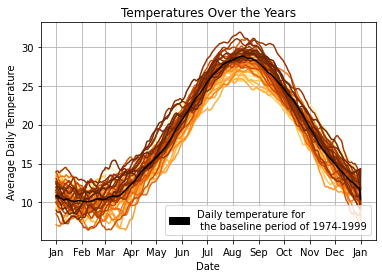

In [87]:
p = sns.lineplot(x=q3data2['monthday']
           , y="Rolling Average",
            hue=q3data2['DATE'].dt.year,
             data = q3data2,
             palette = sns.color_palette("YlOrBr",as_cmap = True), #source: https://seaborn.pydata.org/tutorial/color_palettes.html
             legend = None,
                 ci=None
            )
p.set_ylabel('Average Daily Temperature',fontsize = 10)
p.set_xlabel('Date',fontsize = 10)
sns.lineplot(x=q3dailydata2['monthday'],
            y="rolling average",
            data = q3dailydata2,
            color ='black',
            legend = None ,
            ci=None,
           )
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))

daily = mpatches.Patch(color='black', label='Daily temperature for \n the baseline period of 1974-1999')
plt.legend(handles=[daily])
plt.title("Temperatures Over the Years")

plt.savefig('DailyTemperaturesOverTheYears.png') 

plt.grid()
plt.show()
# hue shows that the colors will darken based on the year, palette determines the color,ci removes the shadows and makes execution faster
# legend creates the box that shows what the black line is

> According to this graph, the Athenian weather is fastly getting warmer. More specifically, we can see that the darker the orange gets, the higher the temperatures rise, easily exceeding the baseline. There are also indications that point to extreme heat events in the summer, since some dark orange lines go way over the top.

## Q4: Extreme Temperature Events

### 4.1 Calculating the Grey Line

>I have to first find the grey line, based on which the data will be colored.

>I already have a dataset that contains the average temperature of each day for the period of 1974-1999 so I am going to use it.

>To determine if an event is extreme it needs to be 10% above the average. In other words, I am multiplying all the day averages by 0.1 and adding it to the original in order to have ready the amount that the temperatures have to surpass in order to be considered extreme.

In [88]:
baseline = q3dailydata.copy() #we already have the dataframe we want for the dataset

In [89]:
baseline.head()

,DATE,TAVG,day,month,25yeardayaverage
6940,1974-01-01,11.6,1,1,10.780
6941,1974-01-02,13.7,2,1,11.136
6942,1974-01-03,12.2,3,1,10.616
6943,1974-01-04,10.8,4,1,10.020
6944,1974-01-05,9.6,5,1,10.316


In [90]:
baseline['extreme_heat_baseline']=baseline['25yeardayaverage'] + baseline['25yeardayaverage'].mul(0.1)

In [91]:
baseline.head()

,DATE,TAVG,day,month,25yeardayaverage,extreme_heat_baseline
6940,1974-01-01,11.6,1,1,10.780,11.8580
6941,1974-01-02,13.7,2,1,11.136,12.2496
6942,1974-01-03,12.2,3,1,10.616,11.6776
6943,1974-01-04,10.8,4,1,10.020,11.0220
6944,1974-01-05,9.6,5,1,10.316,11.3476


>Now I am copying the original data of 1974-1999 in order to compare it with the extreme heat baseline that will consider if a day had an extreme heat event.

In [92]:
q4bsdata = croppedData[["DATE","TAVG"]].copy()

In [93]:
q4bsdata.head()

,DATE,TAVG
0,1955-01-01,NaN
1,1955-01-02,NaN
2,1955-01-03,NaN
3,1955-01-04,NaN
4,1955-01-05,NaN


In [94]:
q4bsdata = q4bsdata.loc[(q4bsdata ['DATE'].dt.year >= 1974) 
                    & (q4bsdata ['DATE'].dt.year <= 1999) ] #creating the dataframe that contains the data from 1974-1999]

In [95]:
q4bsdata.head()

,DATE,TAVG
6940,1974-01-01,11.6
6941,1974-01-02,13.7
6942,1974-01-03,12.2
6943,1974-01-04,10.8
6944,1974-01-05,9.6


In [96]:
baseline.shape

(9496, 6)

In [97]:
q4bsdata.shape

(9496, 2)

>I will place into a boolean column True if the event was extreme and False if it wasnt

>I can do it since as shown above the dataframes have same row size

>So we can compute when a day was an extreme event of heat             

In [98]:
q4bsdata['IsExtreme'] = q4bsdata['TAVG']-baseline['extreme_heat_baseline'] >0            #dataframes have same row size | we computer where a day was an extreme event of heat                                

In [99]:
q4bsdata['IsExtreme'].unique()

array([False,  True])

In [100]:
q4bsdata['IsExtreme'].value_counts() #makes sense

False    7870
True     1626
Name: IsExtreme, dtype: int64

>Now I am counting how many extreme events each year had and I am placing it into a new column

In [101]:
q4bsdata['numberofyearlyextreme'] = q4bsdata.groupby(q4bsdata['DATE'].dt.year)['IsExtreme'].transform(sum)

In [102]:
q4bsdata.head()

,DATE,TAVG,IsExtreme,numberofyearlyextreme
6940,1974-01-01,11.6,False,48
6941,1974-01-02,13.7,True,48
6942,1974-01-03,12.2,True,48
6943,1974-01-04,10.8,False,48
6944,1974-01-05,9.6,False,48


>In order to get the average events of extreme heat per year, I have to divide with 366 or 365 depending on if it is a leap year

>This can easily be done with the use of the fuction where as shown below.

In [103]:
q4bsdata['PercentageExtreme'] = np.where(q4bsdata['DATE'].dt.is_leap_year, q4bsdata['numberofyearlyextreme']/366, q4bsdata['numberofyearlyextreme']/365)

In [104]:
q4bsdata.head()

,DATE,TAVG,IsExtreme,numberofyearlyextreme,PercentageExtreme
6940,1974-01-01,11.6,False,48,0.131507
6941,1974-01-02,13.7,True,48,0.131507
6942,1974-01-03,12.2,True,48,0.131507
6943,1974-01-04,10.8,False,48,0.131507
6944,1974-01-05,9.6,False,48,0.131507


> Now I am preparing the data for plotting. More specifically, I am creating a year column and then removing the useless columns in order to drop duplicates and only have the year and the percentage of extreme temperature of the year.

In [105]:
q4bsdata['year'] = q4bsdata.DATE.dt.year

In [106]:
q4bsdata2 = q4bsdata.drop(columns=['TAVG','IsExtreme','DATE','numberofyearlyextreme'])

In [107]:
q4bsdata2.reset_index(drop=True,inplace=True)

In [108]:
q4bsdata2.drop_duplicates(keep='first',inplace=True)

In [109]:
q4bsdata2.head()

,PercentageExtreme,year
0,0.131507,1974
365,0.172603,1975
730,0.136612,1976
1096,0.241096,1977
1461,0.178082,1978


>Finally, to compute the value of the grey line, I am going to get the average of the percentages of extreme events of all they years and save it for later.

In [110]:
yearsaverageextremeevents = (q4bsdata2['PercentageExtreme'].sum())/25

In [111]:
print(yearsaverageextremeevents) #this is the grey line in the graph

0.17810674451680517


### 4.2 Calculating the rest of the data

>From now on I am going to handle the rest of the data

In [112]:
q4otherdata = croppedData[["DATE","TAVG"]].copy()

In [113]:
q4otherdata.head()

,DATE,TAVG
0,1955-01-01,NaN
1,1955-01-02,NaN
2,1955-01-03,NaN
3,1955-01-04,NaN
4,1955-01-05,NaN


In [114]:
q4otherdata.shape

(24107, 2)

> I am also choosing only one baseline year,which has to be a leap year in order to contain all information, so I can compare the rest of the data's days with this and determine whether they are extreme or not.

>However, the shape of those two dataframes is not the same so in order to compare them I have to do a little "trick"

In [115]:
baseline = baseline.loc[baseline['DATE'].dt.year==1976] #choosing a leap year so it contains all the data

In [116]:
baseline.shape

(366, 6)

In [117]:
baseline.reset_index(drop=True,inplace=True)

>The "trick" requires the creation of a column that has only the month and the day 

In [118]:
baseline['monthday'] = baseline.DATE.astype(str).str[5:]

In [119]:
baseline.head()

,DATE,TAVG,day,month,25yeardayaverage,extreme_heat_baseline,monthday
0,1976-01-01,11.3,1,1,10.780,11.8580,01-01
1,1976-01-02,12.4,2,1,11.136,12.2496,01-02
2,1976-01-03,13.6,3,1,10.616,11.6776,01-03
3,1976-01-04,13.6,4,1,10.020,11.0220,01-04
4,1976-01-05,8.4,5,1,10.316,11.3476,01-05


In [120]:
q4otherdata['monthday'] = q4otherdata.DATE.astype(str).str[5:]

>The trick essentially maps the baseline extreme heat baseline column based on the monthday column. So, in every 01/01 cell in my big dataframe, it is goign to map the extreme heat baseline value of 01/01 and subtract it from the temperature of that day.

>The temperatures that are above 0 will then be considered as extreme heat indicators.

>https://stackoverflow.com/questions/57278057/subtract-columns-from-dataframes-with-different-shapes-by-looking-up-based-on-an

In [121]:
q4otherdata['TAVG'] -= q4otherdata.monthday.map(baseline.set_index('monthday').extreme_heat_baseline) #https://stackoverflow.com/questions/57278057/subtract-columns-from-dataframes-with-different-shapes-by-looking-up-based-on-an

In [122]:
q4otherdata['IsExtreme'] = q4otherdata['TAVG']>0

In [123]:
q4otherdata.head()

,DATE,TAVG,monthday,IsExtreme
0,1955-01-01,NaN,01-01,False
1,1955-01-02,NaN,01-02,False
2,1955-01-03,NaN,01-03,False
3,1955-01-04,NaN,01-04,False
4,1955-01-05,NaN,01-05,False


In [124]:
q4otherdata['IsExtreme'].unique()

array([False,  True])

In [125]:
q4otherdata['IsExtreme'].value_counts() #makes sense

False    19060
True      5047
Name: IsExtreme, dtype: int64

> Then I am counting based on the year how many extreme events have occured and putting them in a new column.

>Then I am going to follow the same process to determine the percentage of extreme heat events per year as in the baseline dataframe.

>Finally I am going to drop columns and duplicates in order to use it in the plot.

In [126]:
q4otherdata['numberofyearlyextreme'] = q4otherdata.groupby(q4otherdata['DATE'].dt.year)['IsExtreme'].transform(sum)

In [127]:
q4otherdata['PercentageExtreme'] = np.where(q4otherdata['DATE'].dt.is_leap_year, q4otherdata['numberofyearlyextreme']/366, q4otherdata['numberofyearlyextreme']/365)

In [128]:
q4otherdata['year'] = q4otherdata['DATE'].dt.year

In [129]:
q4otherdata.head()

,DATE,TAVG,monthday,IsExtreme,numberofyearlyextreme,PercentageExtreme,year
0,1955-01-01,NaN,01-01,False,0,0.0,1955
1,1955-01-02,NaN,01-02,False,0,0.0,1955
2,1955-01-03,NaN,01-03,False,0,0.0,1955
3,1955-01-04,NaN,01-04,False,0,0.0,1955
4,1955-01-05,NaN,01-05,False,0,0.0,1955


In [130]:
q4otherdata2 = q4otherdata.drop(columns=['TAVG','IsExtreme','DATE','numberofyearlyextreme','monthday'])

In [131]:
q4otherdata2.drop_duplicates(keep='first',inplace=True)

In [132]:
q4otherdata2.reset_index(drop=True,inplace=True)

### 4.3 Designing the Plot

>I have the value for the grey line and the percentages of extreme events for each year. 

>Every percentage that is above the grey line will be colored red, while the ones under will be colored blue.

>There will be a legend explaining the grey line

In [133]:
q4otherdata2.head() #data for year 1955-2020

,PercentageExtreme,year
0,0.000000,1955
1,0.000000,1956
2,0.087671,1957
3,0.263014,1958
4,0.000000,1959


In [134]:
print(yearsaverageextremeevents) #grey line of the graph

0.17810674451680517


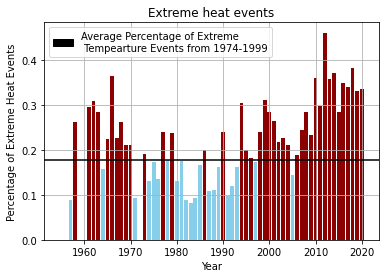

In [135]:
fig = plt.figure()

plt.bar(q4otherdata2['year'],q4otherdata2['PercentageExtreme'],color = ((q4otherdata2['PercentageExtreme'] - yearsaverageextremeevents) > 0).map
                                            ({True:'darkred', False:'skyblue'}))

plt.axhline(yearsaverageextremeevents,color='black')

plt.xlabel('Year')
plt.ylabel('Percentage of Extreme Heat Events')
plt.title("Extreme heat events")
plt.grid()

rolling = mpatches.Patch(color='black', label='Average Percentage of Extreme \n Tempearture Events from 1974-1999')
plt.legend(handles=[rolling])

plt.savefig('ExtremeHeatEvents.png')           

plt.show()


>This graph shows that in the period of 1960-1995 there werent many extreme heat events and even if they were above the average, there still would not be that many in a year. However, after 1995 every year there was a heavy increase in the percentage of extreme heat events that makes sense based on our previous plots, since ,as shown in Q2, our summers are getting warmer. Additionly, though, in this plot we can see that not only our summers are getting warmer, but possibly the rest of the seasons too, which can be very problematic if the temperature keeps rising with that pace.

>Here I want to mention that this plot is the one that made me change my mind in the fillna policy mentioned above. If I were to use the averages to fill all nun values of TAVG, this graph would be way different and would show that there were more extreme heat events in 1959 than in 2000. This would obviously be false information and that is why I decided that I should not use this strategy.

## Q5: Precipitation

### 5.1 Preparing the DataFrame

> In this final question I will only use the PRCP so I am dropping the rest of the columns

In [136]:
q5data = croppedData.copy()

In [137]:
q5data.drop(columns=['TAVG','season','season_name'],inplace=True)

In [138]:
q5data.head()

,DATE,PRCP
0,1955-01-01,0.0
1,1955-01-02,2.0
2,1955-01-03,0.0
3,1955-01-04,0.0
4,1955-01-05,0.0


>In order to compute the total rainfall of a year, I am grouping by based on the year and summing all the PRCP values.

In [139]:
q5data['overall_rainfall'] = q5data.groupby(q5data['DATE'].dt.year)['PRCP'].transform(sum)

In [140]:
q5data.head()

,DATE,PRCP,overall_rainfall
0,1955-01-01,0.0,547.0
1,1955-01-02,2.0,547.0
2,1955-01-03,0.0,547.0
3,1955-01-04,0.0,547.0
4,1955-01-05,0.0,547.0


In [141]:
q5data.isnull().sum()

DATE                  0
PRCP                379
overall_rainfall      0
dtype: int64

> I am also filling the null PRCP values with 0 since they are too few to make a difference

In [142]:
q5data.fillna(0,inplace= True) #fill missing PRCP values with 0 since there are way to few

In [143]:
q5data.isnull().sum()

DATE                0
PRCP                0
overall_rainfall    0
dtype: int64

>In order to determine if there was rain in a day I just have to see if the PRCP is positive and store it in a column

In [144]:
q5data['rained'] = q5data['PRCP'] > 0

In [145]:
q5data.head()

,DATE,PRCP,overall_rainfall,rained
0,1955-01-01,0.0,547.0,False
1,1955-01-02,2.0,547.0,True
2,1955-01-03,0.0,547.0,False
3,1955-01-04,0.0,547.0,False
4,1955-01-05,0.0,547.0,False


>Here I am computing the total of the rainy days in a year and then I am dividing the overall rainfall with these days in order to see the average PRCP.

In [146]:
q5data['daysthatrained'] = q5data.groupby(q5data['DATE'].dt.year)['rained'].transform(sum)

In [147]:
q5data.head()

,DATE,PRCP,overall_rainfall,rained,daysthatrained
0,1955-01-01,0.0,547.0,False,68
1,1955-01-02,2.0,547.0,True,68
2,1955-01-03,0.0,547.0,False,68
3,1955-01-04,0.0,547.0,False,68
4,1955-01-05,0.0,547.0,False,68


In [148]:
q5data['average_PRCP'] = q5data['overall_rainfall']/q5data['daysthatrained']

>Here I am again cleaning up the dataframe to prepare it for plotting.

>I am dropping duplicates and creating a year column.

In [149]:
q5data['year'] = q5data['DATE'].dt.year

In [150]:
q5data.head()

,DATE,PRCP,overall_rainfall,rained,daysthatrained,average_PRCP,year
0,1955-01-01,0.0,547.0,False,68,8.044118,1955
1,1955-01-02,2.0,547.0,True,68,8.044118,1955
2,1955-01-03,0.0,547.0,False,68,8.044118,1955
3,1955-01-04,0.0,547.0,False,68,8.044118,1955
4,1955-01-05,0.0,547.0,False,68,8.044118,1955


In [151]:
q5data.drop(columns=['rained','daysthatrained','PRCP','DATE','overall_rainfall'],inplace=True)

In [152]:
q5data.drop_duplicates(keep='first',inplace=True)

In [153]:
q5data.reset_index(drop=True,inplace=True)

In [154]:
q5data.head()

,average_PRCP,year
0,8.044118,1955
1,5.409615,1956
2,4.153425,1957
3,5.147059,1958
4,3.451613,1959


>Lastly, I am creating the rolling average of 10 years,while using the min_periods =1 so that my line starts from the begging of the graph

In [155]:
q5data['rolling'] = q5data['average_PRCP'].rolling(10,min_periods=1).mean()

### 5.2 Creating the Plot

>In the plot I am just showing the averagePRCP data for each year and the 10 years rolling average of this data is overlapping it in order to show the trend.

>A legend is also added to explain what we are seeing

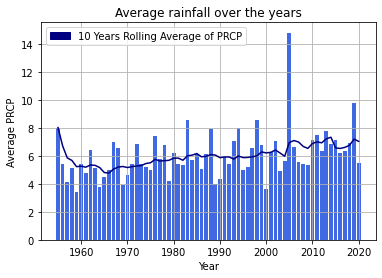

In [156]:
fig = plt.figure()

plt.bar(q5data['year'],q5data['average_PRCP'],color = 'royalblue')
                                            
plt.plot(q5data['year'],q5data['rolling'],color='navy')


plt.xlabel('Year')
plt.ylabel('Average PRCP')
plt.title("Average rainfall over the years")
plt.grid()

rolling = mpatches.Patch(color='navy', label='10 Years Rolling Average of PRCP')
plt.legend(handles=[rolling])

plt.savefig('PRCP_Average.png')           
            

plt.show()


>This figure shows that the amount of rainfall has risen the past years and that there is a general trend to increase. 

## CONCLUSION

>We can see that there is a trend for more extreme temperatures annually,a rise in rainfall and a rise in extreme heat events. In other words, the climate is becoming more unpredictable and extreme. The signs of climate change are clear in the climate of Athens and will continue to become more evident in the years to come as more extreme events will take place.